# Deep Learning - Plots

This notebook extracts the loss values from the log files and plots them.

## Read Log File

Extract only the final lines of each epoch.

In [2]:
log_file_path = 'slurm-63.out'

search_strings = ["monet_gen_loss", "439/439"]
exclude_string = "ETA"

lines = []

In [3]:
with open(log_file_path, 'r') as log_file:
    for line in log_file:
        if all(search_string in line for search_string in search_strings) and exclude_string not in line:
             l = line.strip()  # Print the line without leading/trailing whitespace
             lines.append(l)
             print(l)

439/439 [==============================] - 1356s 3s/step - monet_gen_loss: 1.0029 - photo_gen_loss: 0.9956 - monet_disc_loss: 0.6820 - photo_disc_loss: 0.6860


## Extract Loss Values 

In [4]:
# Define the regular expression pattern to match the loss values
loss_pattern = r"monet_gen_loss: (\d+\.\d+).*photo_gen_loss: (\d+\.\d+).*monet_disc_loss: (\d+\.\d+).*photo_disc_loss: (\d+\.\d+)"

# Initialize lists to store the extracted loss values
monet_gen_losses = []
photo_gen_losses = []
monet_disc_losses = []
photo_disc_losses = []

In [5]:
import re

for line in lines:
    match = re.search(loss_pattern, line)
    if match:
        monet_gen_losses.append(float(match.group(1)))
        photo_gen_losses.append(float(match.group(2)))
        monet_disc_losses.append(float(match.group(3)))
        photo_disc_losses.append(float(match.group(4)))

In [6]:
# Print the extracted loss values
print("Monet Gen Losses:", monet_gen_losses)
print("Photo Gen Losses:", photo_gen_losses)
print("Monet Disc Losses:", monet_disc_losses)
print("Photo Disc Losses:", photo_disc_losses)

Monet Gen Losses: [1.7023, 1.3357, 1.3044, 1.2738, 1.2544, 1.2121, 1.1602, 1.1328, 1.1099, 1.0907, 1.0742, 1.0621, 1.0524, 1.0442, 1.0374, 1.0324, 1.0257, 1.0173, 1.0084, 1.0029]
Photo Gen Losses: [1.7213, 1.3557, 1.3218, 1.282, 1.2553, 1.2128, 1.1615, 1.132, 1.1098, 1.0878, 1.0712, 1.0588, 1.0509, 1.0449, 1.0389, 1.0332, 1.0235, 1.0131, 1.0028, 0.9956]
Monet Disc Losses: [0.6891, 0.689, 0.689, 0.6893, 0.6901, 0.6904, 0.69, 0.6886, 0.6892, 0.6886, 0.6887, 0.6882, 0.688, 0.6873, 0.6876, 0.6864, 0.6847, 0.6835, 0.6831, 0.682]
Photo Disc Losses: [0.6797, 0.6826, 0.6838, 0.686, 0.6905, 0.6898, 0.6895, 0.6894, 0.6895, 0.6905, 0.6901, 0.6895, 0.6883, 0.6866, 0.6867, 0.6861, 0.6861, 0.6855, 0.6859, 0.686]


## Plot Losses

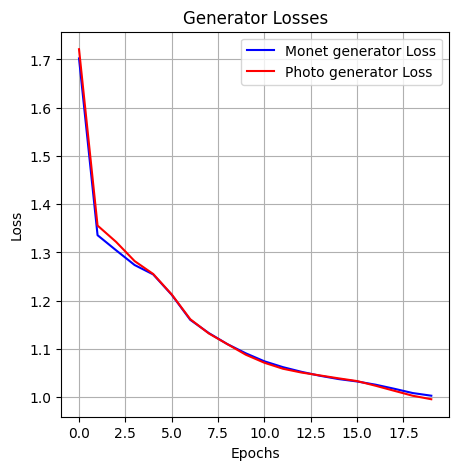

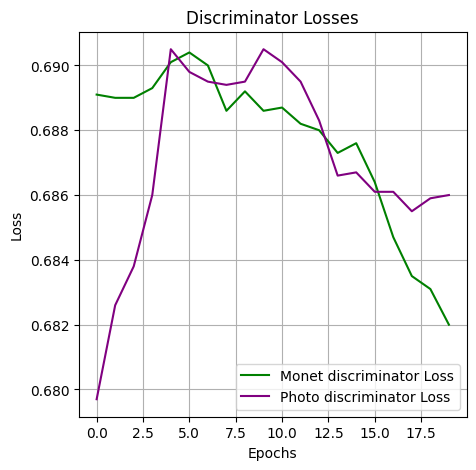

In [7]:
import matplotlib.pyplot as plt

# Create a separate figure for the generator losses
plt.figure(figsize=(5, 5))
plt.plot(monet_gen_losses, label='Monet generator Loss', color='blue')
plt.plot(photo_gen_losses, label='Photo generator Loss', color='red')
plt.title('Generator Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

# Create a separate figure for the discriminator losses
plt.figure(figsize=(5, 5))
plt.plot(monet_disc_losses, label='Monet discriminator Loss', color='green')
plt.plot(photo_disc_losses, label='Photo discriminator Loss', color='purple')
plt.title('Discriminator Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()